# XRD Calibration
---

using diffraction patterns from database

$f = \dfrac{1}{f_{\max}}\displaystyle\sum_j f_j $

$f_j = I_j \gamma_j e^{\dfrac{-\frac{1}{2}(x-(\mu_j+\Delta_j))^2}{\sigma_j^2}}$

where $I$ is the intensity, $\gamma$ if correction to intensity 

$f = \dfrac{1}{f_{\max}}  \displaystyle\sum_j I_j \gamma_j e^{\dfrac{-\frac{1}{2}(x-(\mu_j+\Delta_j))^2}{\sigma_j^2}}$

$\dfrac{\partial f}{\partial \sigma^2_j} = \dfrac{\partial f_j}{\partial \sigma^2_j} - f_j\dfrac{1}{{f_\max}^2}\dfrac{\partial f_{\max}}{\partial \sigma^2_j} $

since $f_\max = 1$

$\dfrac{\partial f}{\partial \sigma^2_j} = \dfrac{\partial f_j}{\partial \sigma^2_j} - f_j\dfrac{\partial f_{\max}}{\partial \sigma^2_j} $

$\dfrac{\partial f_j}{\partial \sigma^2_j} = \dfrac{1}{2}\dfrac{[x-(\mu_j+\Delta_j)]^2}{\sigma_j^4}f_j$

following the above

$\dfrac{\partial f_j}{\partial \gamma_j} = I_j e^{\dfrac{-\frac{1}{2}(x-(\mu_j+\Delta_j))^2}{\sigma_j^2}} $

$\dfrac{\partial f_j}{\partial \Delta_j} = \dfrac{x - (\mu + \Delta)}{\sigma^2} f_j$


---
### notes

add Hessian matrix


---

Rewriting $x$ as a function of the calibration curve

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}(g(\Omega;a,b,c,d)-\mu_j)^2}{\sigma_j^2}}$

here $\Omega$ denotes channels

$x \equiv g(\Omega) = a + b\Omega + c\Omega^2 + d\Omega^3$ 

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}(a + b\Omega + c\Omega^2 + d\Omega^3-\mu_j)^2}{\sigma_j^2}}$

$\dfrac{\partial f_j}{\partial a} = -\dfrac{ 1}{\sigma_j^2}(a + b\Omega + c\Omega^2 + d\Omega^3 - \mu_j) f_j$

$= -\dfrac{ 1}{\sigma_j^2}(g(\Omega) - \mu_j) f_j$

$\dfrac{\partial f_j}{\partial b} = -\dfrac{ \Omega (g(\Omega) - \mu_j) }{\sigma_j^2}f_j  $

$\dfrac{\partial f_j}{\partial c} = -\dfrac{ \Omega^2 (g(\Omega) - \mu_j) }{\sigma_j^2}f_j  $

$\dfrac{\partial f_j}{\partial d} = -\dfrac{ \Omega^3 (g(\Omega) - \mu_j) }{\sigma_j^2}f_j  $


---
Geometric fucntion

$\theta = \dfrac{180}{\pi} \tan^{-1}\left(\dfrac{x + a}{s}\right) + \beta$



$x$ and $a$ in the units of channels. $s$ is also in the units of channels and it rescales the detector range.
$\beta[^\circ]$ is an angle.

$\dfrac{\partial\theta}{\partial s} = -\dfrac{180}{\pi} \dfrac{a+x}{a^2+2ax+s^2+x^2}= -\dfrac{180}{\pi} \dfrac{a+x}{(a+x)^2+s^2}$

$\dfrac{\partial\theta}{\partial a} = \dfrac{180}{\pi} \dfrac{s}{a^2+2ax+s^2+x^2} = \dfrac{180}{\pi} \dfrac{s}{(a+x)^2+s^2}$

$\dfrac{\partial\theta}{\partial \beta} = 1$

$\theta = \dfrac{180}{\pi}\left[ \tan^{-1}\left(\dfrac{x + a}{z\sin\left(\beta\right)}\right) + \beta\right]$

here $\beta$ is in radians

$\dfrac{\partial\theta}{\partial z} = -\dfrac{180}{\pi}\dfrac{(a + x) \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta)}$

$\dfrac{\partial\theta}{\partial a} = \dfrac{180}{\pi}\dfrac{z \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta))}$

$\dfrac{\partial\theta}{\partial \beta} = \dfrac{180}{\pi} \left[ 1 - \dfrac{z (a + x) \cot(\beta) \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta)} \right]$

Rewriting $x$ as a function of the calibration curve

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}(g(\Omega;a,b,s)-\mu_j)^2}{\sigma_j^2}}$

here $\Omega$ denotes channels

$x \equiv g(\Omega) = \dfrac{180}{\pi} \tan^{-1}\left(\dfrac{\Omega + a}{s}\right) + \beta$ 

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}\left[\dfrac{180}{\pi} \tan^{-1}\left(\dfrac{\Omega + a}{s}\right) + \beta-\mu_j\right]^2}{\sigma_j^2}}$

$\dfrac{\partial f_j}{\partial a} = -\dfrac{ 1}{\sigma_j^2}\dfrac{\partial g(\Omega)}{\partial a}(g(\Omega) - \mu_j) f_j$

In [1]:
from src.database import DatabaseXRD,snip
from numpy import newaxis,loadtxt,diag,arange,linspace,sin,concatenate,array,exp,pi,zeros,ones,prod,newaxis,arctan,savetxt,c_,fabs,sqrt,concatenate
from numpy.random import normal
from numpy.linalg import pinv,inv
from scipy.optimize import curve_fit,least_squares
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

from matplotlib.pyplot import plot,show,vlines,xlim,ylim,figure,semilogx,scatter,xlabel,ylabel,subplots

from glob import glob

from scipy import signal
from numpy import fft,pad,concatenate,stack

In [2]:
def fce_calibration(x,a,beta,s):
    return (arctan((x+a)/s)) * 180 / pi + beta

class Spectra():

    def __init__(self,file=None):
        if file:
            self.read_from_file(file)
            
        self.opt = array([-1264.,51.,2061.])
        self.a,self.beta,self.s = self.opt[:,newaxis]
    
    def read_from_file(self,file):
        
        self.raw_theta,self.raw_intensity = loadtxt(file,unpack=True)
        self.channel = arange(1280)
        
        self.intensity = self.raw_intensity/self.raw_intensity.max()
        
    def fce_calibration(self,x,a,beta,s):
        return (arctan((x+a)/s)) * 180 / pi + beta
    
    def fce_calibration_z(self,x,a,b,z):
        return (arctan((x+a)/(z*sin(b))) + b) * 180 / pi
    
    def calibrate_from_file(self,file):           
        
        x,y = loadtxt(file,unpack=True)
        self.opt,(opt_var) = curve_fit(self.fce_calibration,x,y)
        
        self.a,self.beta,self.s = self.opt[:,newaxis]
        
        self.opt_file = self.opt.copy() 
               
        return self
    
    @property
    def theta(self):
        return self.fce_calibration(self.channel,*self.opt)
    
    def snip(self,m = 24):

        y = self.intensity
        y = y - snip(y,m)
        self.intensity = y/y.max()
        
        return self
    
    def convolve(self,w=24):
        off = 4 * w
        kernel = signal.windows.gaussian(2*off-1,w)

        y = self.intensity
        y_pad = pad(y,(off,off),'edge')

        f = fft.rfft(y_pad)
        w = fft.rfft(kernel,y_pad.shape[-1])
        y = fft.irfft(w * f)

        y = y[off*2:]
        self.intensity = y/y.max()
        
        return self
    
    def plot(self, *args, **kwargs):

        plot(self.theta,self.intensity, *args, **kwargs)
        
        return self
        

In [6]:
class GaussNewton():
    
    def __init__(self,phase,spectra):
        
        if isinstance(phase,list):
            self.phase = phase
        else:
            self.phase = [phase]
            
        self.spectra = spectra
            
        self.mu = []
        self.intensity = []
        
        for phase in self.phase:
            #p.get_theta(l=[1.541,1.391],scale=[1.0,0.008])
            
            phase.get_theta(l=[1.541],scale=[1.0])  
            f = (phase.theta < 51) & (phase.intensity > 0.05)
            
            phase.f = f
        
            self.mu += list(phase.theta[f])
            self.intensity += list(phase.intensity[f])
            
        self.mu,self.intensity = array(sorted(zip(self.mu,self.intensity))).T
        
        self.n = len(self.mu)
        self.n_channel = len(self.channel)
        
        self.params = zeros(self.n * 2)
        self.sigma2 = self.params[:self.n]
        self.gamma = self.params[self.n:]
   
        self.sigma2[:] = 0.04
        self.gamma[:] = 1

    @property
    def theta(self):
        return self.spectra.theta
    
    @property
    def channel(self):
        return self.spectra.channel
        
    def gauss(self,x,mu,sigma2):
        return exp(-0.5 * (x - mu)**2 / sigma2)
    
    def dsigma2(self,x,mu,sigma2):
        return 0.5 * (x - mu)**2 / sigma2**2
    
    def da(self,channel,x,a,s,mu,sigma2):
        return -1.0 / sigma2 * 180 / pi * s / ((a + channel)**2 + s**2) * (x - mu)
    
    def ds(self,channel,x,a,s,mu,sigma2):
        return 1.0 / sigma2 * 180 / pi * (a + channel) / ((a + channel)**2 + s**2) * (x - mu)
    
    def dbeta(self,x,mu,sigma2):
        return -1.0 / sigma2 * (x - mu)
    
    @property
    def z(self):
        
        y = zeros(len(self.channel))
        x = self.theta
        
        """
        Loop over all peaks
        """
        for mu,I,sigma2,gamma in zip(self.mu,self.intensity,self.sigma2,self.gamma):

            c = self.gauss(x,mu,sigma2)
            h = gamma * I * c
            
            y += h
            
        return y/y.max()

    def plot(self,*args,**kwargs):
        
        plot(self.theta,self.z,*args,**kwargs)
        
        return self
    
    def loop(self):
        
        dsigma2 = []
        dgamma = []
        
        dopt = zeros((3,len(self.spectra.channel)))     
        da,dbeta,ds = dopt[:]
        
        z = zeros(self.n_channel)
        x = self.theta
        
        for mu,I,sigma2,gamma in zip(self.mu,self.intensity,self.sigma2,self.gamma):

            c = self.gauss(x,mu,sigma2)
            h = gamma * I * c
            
            """
            current z
            """
            z += h
            
            dsigma2 += [h * self.dsigma2(x,mu,sigma2)]
            dgamma += [I * c]
            
            da += h * self.da(self.channel,x,*self.spectra.a,*self.spectra.s,mu,sigma2)
            dbeta += h * self.dbeta(x,mu,sigma2)
            ds += h * self.ds(self.channel,x,*self.spectra.a,*self.spectra.s,mu,sigma2)
        
        return z/z.max(),dsigma2,dgamma,dopt
    
    @staticmethod
    def inv(d,y,z):
        
        jmax = z.argmax()
        dz = y - z
               
        dfmax = z[:,newaxis] * d[jmax]
        d = d - dfmax

        return pinv(d) @ dz  
        
    
    def minimize_gamma(self,alpha = 1):

        y = self.spectra.intensity
        z,dsigma2,dgamma,dopt  = self.loop()
        
        d = dgamma
        d = array(d).T
        
        dr = self.inv(d,y,z)
   
        self.gamma[:] += dr * alpha
    
    def rescale(self,dr,alpha):
        
        c = 1
        new_sigma2 = self.sigma2 + dr * alpha * c
        
        while any(new_sigma2 < 0):
            j = new_sigma2.argmin()
            c = new_sigma2[j] / (2 * dr[j])
            new_sigma2 = self.sigma2 + dr * alpha * c
            
        return new_sigma2
        
    
    def minimize_sigma(self,alpha = 1):

        y = self.spectra.intensity
        z,dsigma2,dgamma,dopt = self.loop()
        
        d = dsigma2
        d = array(d).T
        
        dr = self.inv(d,y,z)
        
        new_sigma2 = self.rescale(dr,alpha)
   
        self.sigma2[:] = new_sigma2
    
    def calibration(self,alpha = 1):

        y = self.spectra.intensity
        z,dsigma2,dgamma,dopt = self.loop()
        
        d = dopt
        d = array(d).T
        
        dr = self.inv(d,y,z)
   
        self.spectra.opt[:] += dr * alpha

In [7]:
database = DatabaseXRD().read_cifs('Database/')

calcite = database['Calcite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][2]
spinel = database['Spinel'][0]
barite = database['Barite'][0]

In [9]:
database[Hydrocerussite']

{'Corundum': [{'name': 'Database/Entry_96-100-0018.cif',
   '_chemical_formula_sum': 'Al2 O3',
   '_chemical_name_mineral': 'Corundum',
   '_chemical_name_common': ["'Aluminium", "oxide'"],
   '_pd_peak_intensity': array([[   3.481074,    2.5516  ,    2.3803  ,    2.165667,    2.08605 ,
              1.96487 ,    1.740537,    1.601875,    1.547187,    1.515297,
              1.511201,    1.404988,    1.374267,    1.336436,    1.2758  ,
              1.239304,    1.234446,    1.193496,    1.19015 ,    1.160358,
              1.147615,    1.139057,    1.126151,    1.124466,    1.099239,
              1.082833,    1.07859 ,    1.046627,    1.043025,    1.01797 ],
          [ 651.11    ,  991.79    ,  451.56    ,    5.17    , 1000.      ,
             14.36    ,  479.58    ,  938.54    ,   24.14    ,   30.34    ,
             69.78    ,  354.85    ,  546.66    ,   11.52    ,   13.      ,
            150.01    ,   82.14    ,    6.55    ,   56.46    ,    5.86    ,
             47.56    ,    

In [8]:
xrd_hydrocerussite = Spectra('Cappello/Hydrocerussite/roi_0.dat')
xrd_hydrocerussite.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()

xrd_cinnabar_hydrocerussite = Spectra('Cappello/Cinnabar_Hydrocerussite/roi_0.dat')
xrd_cinnabar_hydrocerussite.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()

xrd_spinel_barite = Spectra('Cappello/Spinel_Barite/roi_0.dat')
xrd_spinel_barite.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()

xrd_calcite = Spectra('Data/roi_0.dat')
xrd_calcite.calibrate_from_file('Data/Calibration.ini').convolve(1).snip()

[6.29191029e-04 2.53797759e+00 2.96000146e-02 3.74947371e-01
 1.95051048e-02 3.54255319e-02 5.62293152e-02 4.18582069e-02
 4.12818228e-02 2.71373521e-02 3.16554398e-02 2.51177813e+01
 3.08393018e-01 1.01192169e-01 1.38910479e-02 4.95259086e-02
 2.71820997e-02 2.26832931e-01 9.47267933e-02 1.28987140e-01
 2.33293991e-02 5.17881131e-01 6.39766117e-03 2.46278293e-01
 3.53210055e-01 2.94942780e-01]
[ 1.37138814  0.40838018  0.60367744  1.97296804  0.9558      0.98403472
  1.00097368  0.81997241  1.72714304  1.1184206   3.36632575  0.4143564
  0.81763653  2.31389408  1.12496345  4.62839033  2.20169406  0.90973743
 10.16064994 -9.02628589  0.62940076  1.39902529  1.13246527  3.46451758
  3.81675464  1.70974085]
[-1265.90750725    53.2929261   1919.90157478]


(-0.1, 1.0)

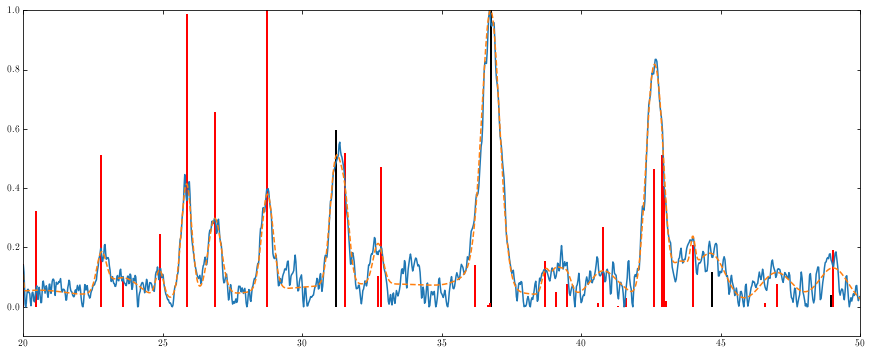

In [395]:
%matplotlib inline
g_spinel_barite = GaussNewton([spinel,barite],xrd_spinel_barite)

for i in range(32):
    g_spinel_barite.minimize_gamma(alpha=1)
    g_spinel_barite.minimize_sigma(alpha=1)
    
for i in range(96):
    g_spinel_barite.calibration(alpha=1)
    
print(g_spinel_barite.sigma2)
print(g_spinel_barite.gamma)
    
figure(figsize=(15,6))

spinel.plot(colors='k',lw=2)
barite.plot(colors='r',lw=2)
xrd_spinel_barite.plot('-')

g_spinel_barite.plot('--')

print(g_spinel_barite.spectra.opt)

xlim(20,50)
ylim(-0.1,1)

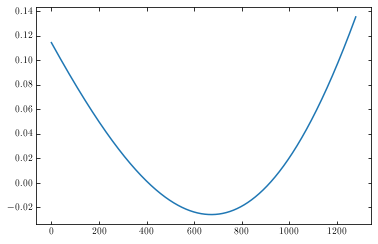

In [365]:
x = arange(1280)
opt_file = fce_calibration(x,*g_spinel_barite.spectra.opt_file)
new_opt = fce_calibration(x,*g_spinel_barite.spectra.opt)

plot(new_opt - opt_file)

(-0.1, 1.0)

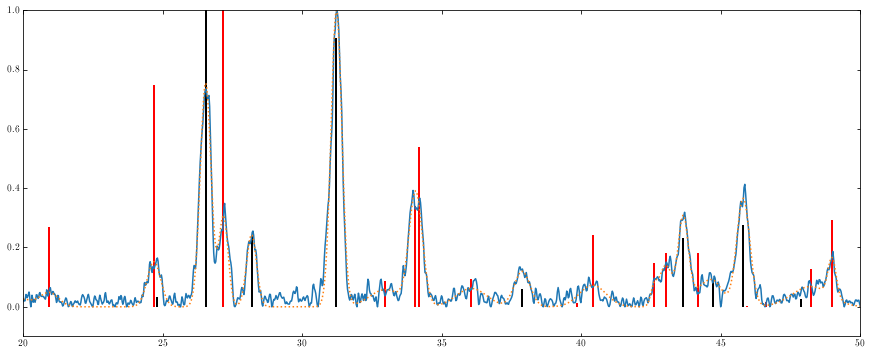

In [388]:
g_cinnabar_hydrocerussite = GaussNewton([hydrocerussite,cinnabar],xrd_cinnabar_hydrocerussite)
g_hydrocerussite = GaussNewton(hydrocerussite,xrd_cinnabar_hydrocerussite)

g_cinnabar_hydrocerussite.gamma[6] = 2

for i in range(8):
    g_cinnabar_hydrocerussite.minimize_gamma(alpha=1)
    g_cinnabar_hydrocerussite.minimize_sigma(alpha=1)

for i in range(8):
    g_cinnabar_hydrocerussite.calibration(alpha=1)

figure(figsize=(15,6))

cinnabar.plot(colors='k',lw=2)
hydrocerussite.plot(colors='r',lw=2)
xrd_cinnabar_hydrocerussite.plot('-')

g_cinnabar_hydrocerussite.plot(':')

xlim(20,50)
ylim(-0.1,1)

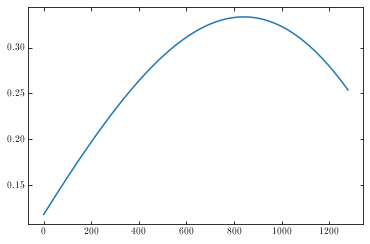

In [389]:
x = arange(1280)
opt_file = fce_calibration(x,*g_cinnabar_hydrocerussite.spectra.opt_file)
new_opt = fce_calibration(x,*g_cinnabar_hydrocerussite.spectra.opt)

plot(new_opt - opt_file)

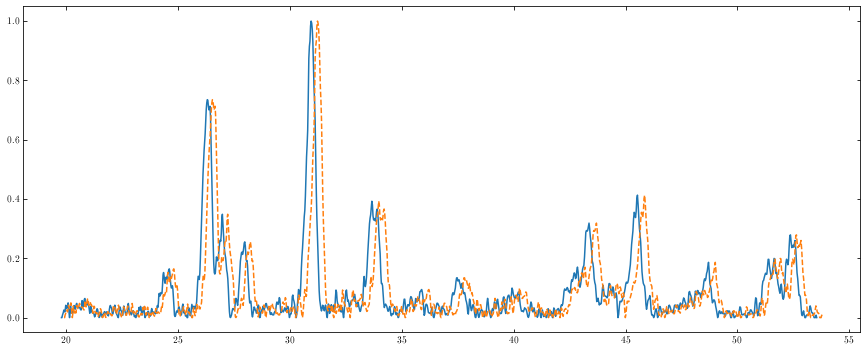

In [390]:
figure(figsize=(15,6))
plot(opt_file,g_cinnabar_hydrocerussite.spectra.intensity)
plot(new_opt,g_cinnabar_hydrocerussite.spectra.intensity,'--')

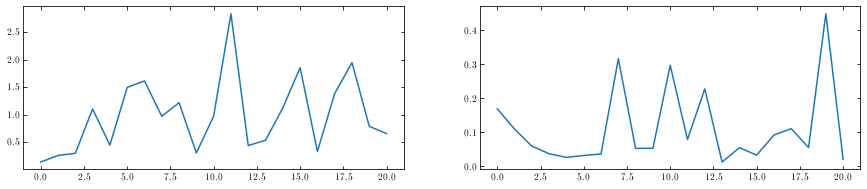

In [391]:
fig,ax = subplots(1,2,figsize=(15,3))
ax[0].plot(g_cinnabar_hydrocerussite.gamma)
ax[1].plot(g_cinnabar_hydrocerussite.sigma2)

[-1158.68387616    49.94955224  1980.28388746]


(-0.1, 1.0)

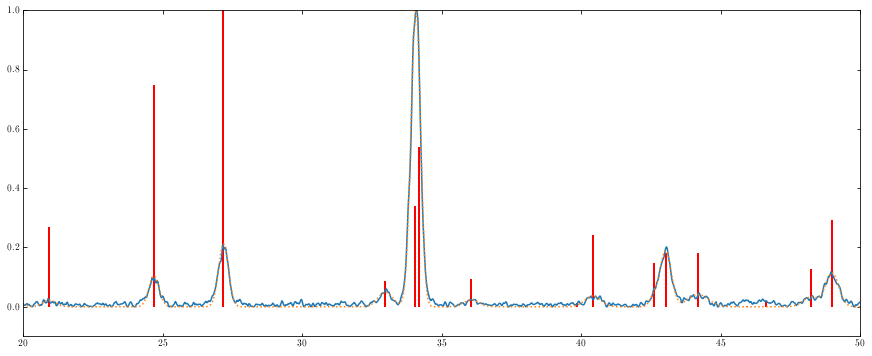

In [392]:
g_hydrocerussite = GaussNewton(hydrocerussite,xrd_hydrocerussite)

g_hydrocerussite.gamma[6] = 2

for i in range(8):
    g_hydrocerussite.minimize_gamma(alpha=1)
    g_hydrocerussite.minimize_sigma(alpha=1)

for i in range(8):
    g_hydrocerussite.calibration(alpha=1)

figure(figsize=(15,6))

hydrocerussite.plot(colors='r',lw=2)
xrd_hydrocerussite.plot('-')

g_hydrocerussite.plot(':')
print(g_hydrocerussite.spectra.opt)

xlim(20,50)
ylim(-0.1,1)

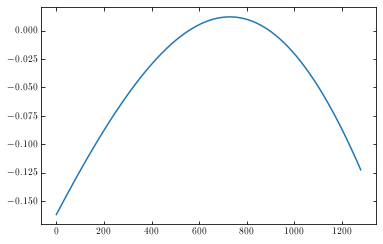

In [393]:
x = arange(1280)
opt_file = fce_calibration(x,*g_hydrocerussite.spectra.opt_file)
new_opt = fce_calibration(x,*g_hydrocerussite.spectra.opt)

plot(new_opt - opt_file)

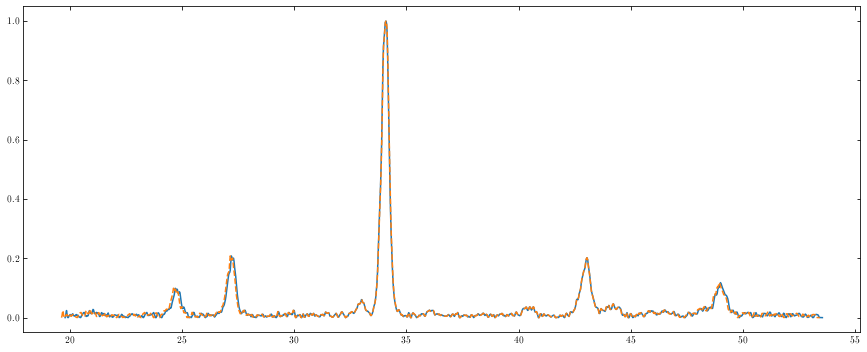

In [394]:
figure(figsize=(15,6))
plot(opt_file,g_hydrocerussite.spectra.intensity)
plot(new_opt,g_hydrocerussite.spectra.intensity,'--')